In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Building artificial nueral network using keras

In [2]:
df = pd.read_csv('Churn_modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [13]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['Geography_Germany'] = la.fit_transform(df['Geography_Germany'])
df['Geography_Spain'] = la.fit_transform(df['Geography_Spain'])
df['Gender_Male'] = la.fit_transform(df['Gender_Male'])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited',axis=1),df['Exited'], test_size=0.2, random_state=42)

In [16]:
X_train.shape

(8000, 11)

In [17]:
y_train.shape

(8000,)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [21]:
import tensorflow

In [24]:
from tensorflow import keras
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense

In [48]:
model = Sequential()
# model.add(Dense(3,activation = 'sigmoid',input_dim = 11))
# model.add(Dense(1,activation = 'sigmoid'))

model.add(Dense(11,activation = 'relu',input_dim=11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics='Accuracy')

In [84]:
model.fit(X_train_scaled,y_train,epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3143 - accuracy: 0.8711
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3133 - accuracy: 0.8724
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.8710
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3129 - accuracy: 0.8724
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3128 - accuracy: 0.8724
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3126 - accuracy: 0.8721
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3127 - accuracy: 0.8701
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3122 - accuracy: 0.8724
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8729
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3116 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3058 - accuracy: 0.8740
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3053 - accuracy: 0.8731
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3049 - accuracy: 0.8751
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3050 - accuracy: 0.8765
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3052 - accuracy: 0.8744
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3045 - accuracy: 0.8770
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.8759
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.8741
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3053 - accuracy: 0.8739
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3044 - accuracy: 

In [85]:
model.layers[1].get_weights()

[array([[-2.3785729e+00, -2.8127789e-01, -4.3844664e-01,  7.3224097e-02,
          2.1297374e-01,  4.7460103e-01, -1.4590135e-01, -1.9821504e-01,
         -5.2727348e-01, -6.9180208e-01,  7.2082907e-01],
        [ 1.8603274e-01, -4.8688316e-01,  3.1164718e-01, -8.0680817e-01,
         -2.7922705e-01,  2.1474596e-02,  6.5074766e-01,  4.1281107e-01,
         -9.7554684e-02,  9.3987107e-01, -6.9570851e-01],
        [ 6.5377939e-01, -3.3122569e-01,  8.7901086e-01, -8.2409608e-01,
          6.3399386e-01,  5.9002864e-01, -3.0274308e-01, -3.6088538e-01,
         -8.1000477e-01, -1.1316735e-01,  1.2286896e-01],
        [-7.6076984e-01, -1.1278204e+00, -3.9418435e-01, -6.1692911e-01,
         -4.9867740e-01, -5.4897702e-01,  6.3169217e-01,  5.9348482e-01,
          4.5522875e-01,  3.2403016e-01,  6.5655522e-02],
        [ 2.9363677e-01,  2.7260885e-01, -6.3963270e-01, -3.6307830e-01,
          1.2616251e-01, -5.6282207e-02,  8.6490208e-01,  9.0412851e-03,
          3.9365948e-03, -2.9033357e-0

In [86]:
model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


array([[0.1093892 ],
       [0.01387822],
       [0.18027022],
       ...,
       [0.8106082 ],
       [0.13729535],
       [0.29275763]], dtype=float32)

In [87]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [88]:
y_pred = np.where(y_log>0.5,1,0)

In [89]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [90]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

In [91]:
acc

0.861

In [92]:
model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [93]:
history=model.fit(X_train_scaled,y_train,epochs = 100 ,validation_split = 0.2)


Epoch 1/100
200/200 [==============================] - 3s 6ms/step - loss: 0.3025 - accuracy: 0.8764 - val_loss: 0.3134 - val_accuracy: 0.8706
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3021 - accuracy: 0.8737 - val_loss: 0.3151 - val_accuracy: 0.8700
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3016 - accuracy: 0.8761 - val_loss: 0.3171 - val_accuracy: 0.8712
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3010 - accuracy: 0.8764 - val_loss: 0.3168 - val_accuracy: 0.8669
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3012 - accuracy: 0.8739 - val_loss: 0.3179 - val_accuracy: 0.8706
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3008 - accuracy: 0.8763 - val_loss: 0.3183 - val_accuracy: 0.8694
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3013 - accuracy: 0.8748 - val_loss: 0.3205 - val_accuracy: 0.8712

Epoch 58/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3001 - accuracy: 0.8781 - val_loss: 0.3256 - val_accuracy: 0.8656
Epoch 59/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2993 - accuracy: 0.8767 - val_loss: 0.3261 - val_accuracy: 0.8662
Epoch 60/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2993 - accuracy: 0.8772 - val_loss: 0.3263 - val_accuracy: 0.8644
Epoch 61/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2991 - accuracy: 0.8780 - val_loss: 0.3277 - val_accuracy: 0.8650
Epoch 62/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2988 - accuracy: 0.8778 - val_loss: 0.3258 - val_accuracy: 0.8656
Epoch 63/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2993 - accuracy: 0.8778 - val_loss: 0.3253 - val_accuracy: 0.8669
Epoch 64/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2991 - accuracy: 0.8788 - val_loss: 0.3275 - val_accuracy:

In [94]:
import matplotlib.pyplot as plt

In [95]:
history.history

{'loss': [0.3025481700897217,
  0.30206793546676636,
  0.3016487956047058,
  0.30104732513427734,
  0.30122867226600647,
  0.30083903670310974,
  0.3012540936470032,
  0.30080029368400574,
  0.30128929018974304,
  0.3010484278202057,
  0.3008147180080414,
  0.30105599761009216,
  0.3005847930908203,
  0.30049028992652893,
  0.3006921708583832,
  0.30049362778663635,
  0.30069926381111145,
  0.30100229382514954,
  0.3000963032245636,
  0.3006685972213745,
  0.3005460202693939,
  0.29997551441192627,
  0.2998826205730438,
  0.3001580536365509,
  0.30066820979118347,
  0.3003946840763092,
  0.3007284998893738,
  0.29995015263557434,
  0.3002401292324066,
  0.2995113134384155,
  0.3006031811237335,
  0.2998290956020355,
  0.29994750022888184,
  0.2996601462364197,
  0.3001880943775177,
  0.3005756437778473,
  0.30001235008239746,
  0.300516813993454,
  0.29967114329338074,
  0.2993372678756714,
  0.30015063285827637,
  0.30030080676078796,
  0.3001437783241272,
  0.3000139892101288,
  0.29

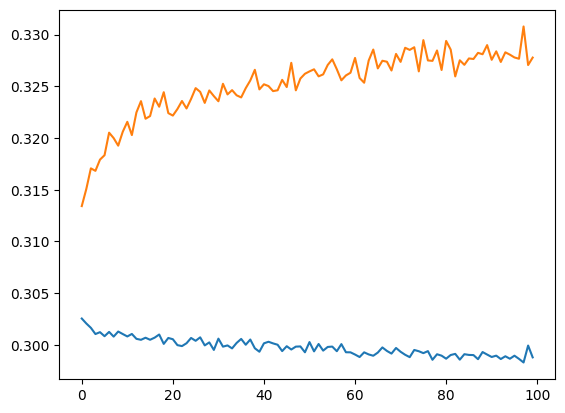

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

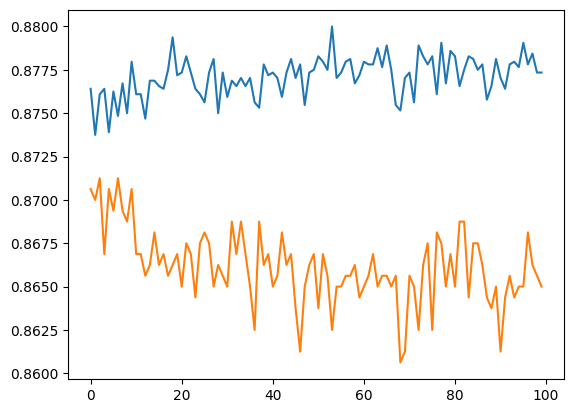

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])